In [ ]:
# to convert this to index.html for slideshow on github, do this in shell:
git commit -m "update index.ipynb"
jupyter nbconvert --to slides index.ipynb
git checkout gh-pages
mv index.slides.html index.html
git add index.html
git commit -m "update index.html"
git push
git checkout master

# Can I use machine learning methods to detect and predict awesome undiscovered campsite locations?

This project stems out of my interest and interest of many outdoor enthusiasts to find amazing and undiscovered areas to go camping. There are several resources currently to locate interesting campsites, but they depend on users entering campsite information. What if we could scan satellite imagery and predict where good campsites will be? 

list resources here
image of cool campsite

example of cool unreported campsite:
add image here

### The overall plan
Initially this project will use data available from the ioverlander mobile app to train and validate predictions. Using lat long coordinates from ioverlander sites, satellite image tiles will be obtained from one of the following sources:
* google earth engine API
* EO Browser (Sentinel hub)
* Planet
* USGS earth explorer

These tiles will be used to train a model using tensorflow in python likely with a convolutional neural network.

Next, this model will be integrated into a user interface platform that allows them to choose a region and the model will return some predicted campsite locations.

### Goal and end product
to add detail here

### Literature review
Others have done similar types of analysis:

* https://github.com/adrianalbert/urban-environments
* https://www.kaggle.com/rhammell/ships-in-satellite-imagery
* https://www.kaggle.com/bhavesh907/crop-classificationcs2292017usgscroplanddata

Important considerations for campsites:
* relatively flat area
* near a road
* on public land
* near water source
* away from buildings
* If weather may impede road access (for example summer only roads)

### Training data - iOverlander
This is a rich source of confirmed campsites we can use as training data.
In the US, it contains over 15,000 user entered points.
You can read more about this app and their mission here:
http://blog.ioverlander.com/about/about-ioverlander/

Click the down arrow to explore this data, obtained from here:
http://blog.ioverlander.com/about/about-ioverlander/

In [9]:
# load the data 
import pandas as pd
wd = './data/'
USdata = pd.read_csv(wd + 'iOverlander Places - United States - 2020-04-29.csv')
USdata.head(2)

,Location,Name,Category,Description,Latitude,Longitude,Altitude,Date verified,Open,Electricity,Wifi,Kitchen,Parking,Restaurant,Showers,Water,Toilets,Big rig friendly,Tent friendly,Pet friendly
0,"Borrego Salton Seaway, Borrego Springs, CA 920...",Anza Borrego - NICE,Wild Camping,Free Camping on Anza Borrego Park. Nice and wa...,33.280572,-116.146887,0.0,2019-01-28 00:00:00 UTC,Yes,Unknown,Unknown,Unknown,NaN,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
1,"Borrego Salton Seaway, Borrego Springs, CA 920...",Arroyo Salado Camping,Established Campground,"Free with two vault toilets, nothing else exis...",33.280188,-116.145788,0.0,2020-02-16 14:20:45 UTC,Yes,No,No,No,NaN,No,No,No,Pit Toilets,Yes,Yes,Yes


Scroll down to check some of this data on a map..

Here, we map the points to a world map

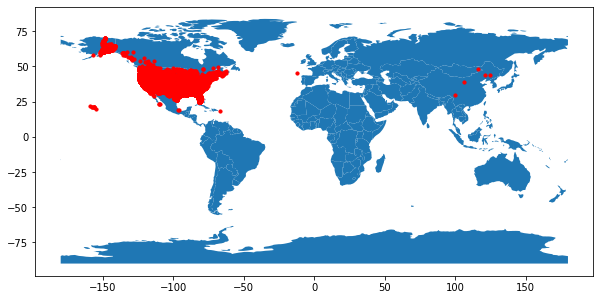

In [8]:
from shapely.geometry import Point
import geopandas as gpd
import descartes

# subset just some categories
USdata_filtered = USdata[USdata.Category.isin(['Wild Camping', 'Informal Campsite'])]

# keep cols we need
USdata_filtered = USdata_filtered.iloc[:,0:6]

# plot on a world map
# TODO make this much better
geometry = [Point(xy) for xy in zip(USdata_filtered['Longitude'], USdata_filtered['Latitude'])]
gdf = gpd.GeoDataFrame(USdata_filtered, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=10);

Let's continue with the project overview

### Ideas for data sources for campsite prediction parameters
* use DEM (digital elevation maps) to get aspect and slope data
* use google maps or similar to get road information

### Why I chose this project

* skills I want to develop and demonstrate
* will be useful to me and others
* broader applications for example, finding safe areas during natural disasters

### Progress so far

* to add detail here

## Thank you!

## Questions?